# Slice and view alignment notebook.

This purpose of this notebook is to align a series of images collected using slice and view on the FIBSEM. 

Firstly run the code below to import the various libraries used in the program.

In [33]:
%matplotlib notebook
import hyperspy.api as hs
from PIL import Image
import os
#comment to check GIT merge

The code below takes all the files within the folder that this notebook and converts them to PNG format. The purpose of this is I had issues getting it to work with tiffs with lzw compression but PNGs worked well

In [34]:
for f in  os.listdir("."):
    if f.endswith(".tif"):
        i = Image.open(f)
        file_name, file_extension = os.path.splitext(f)
        i.save("{}.png".format(file_name))
        print ("saved",file_name, file_extension)

saved a .tif
saved b .tif
saved c .tif
saved d .tif


Next the code below will load the data as a stack and we can view the stack before it has been aligned. If you wish to use a specific ROI for the alignment then move the red box over where you want to align. If you do not want a specific ROI go to section 2b.

<IPython.core.display.Javascript object>


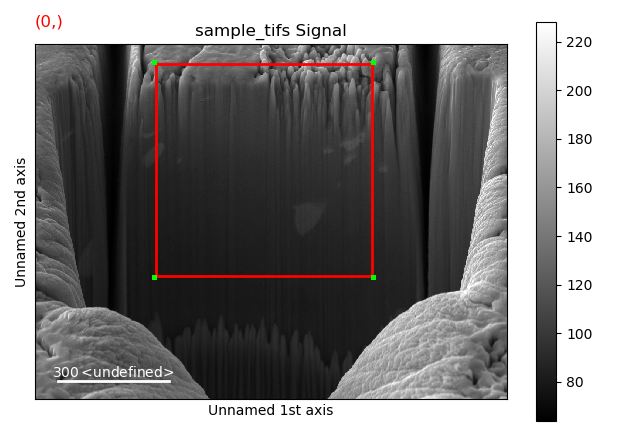

In [35]:
s = hs.load('*.png',stack = True)
s.plot(navigator='slider')
rectangular_roi = hs.roi.RectangularROI(left=50,right=100,top=50,bottom=100)
s_rectangular = rectangular_roi.interactive(s,color='red')

Select region of interest (Optinal)- if you do not want to use a specific ROI then go to section 2b.

Depending on your dataset you may want to align the stack based on a region of interest. If so run the code below, otherwise move on to

We can now view the area we are going to do our alignment on.

<IPython.core.display.Javascript object>


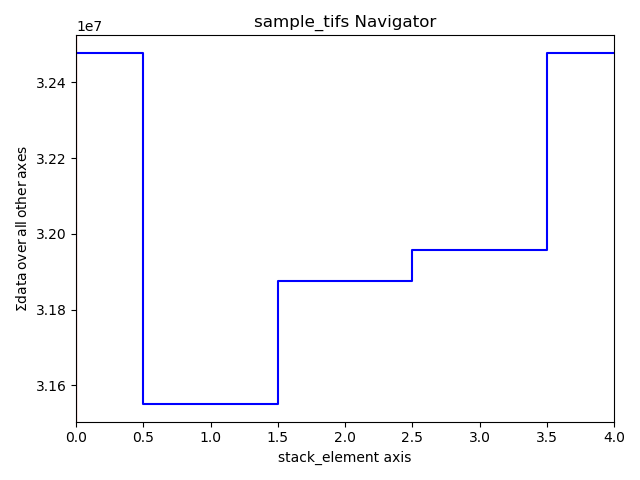

<IPython.core.display.Javascript object>


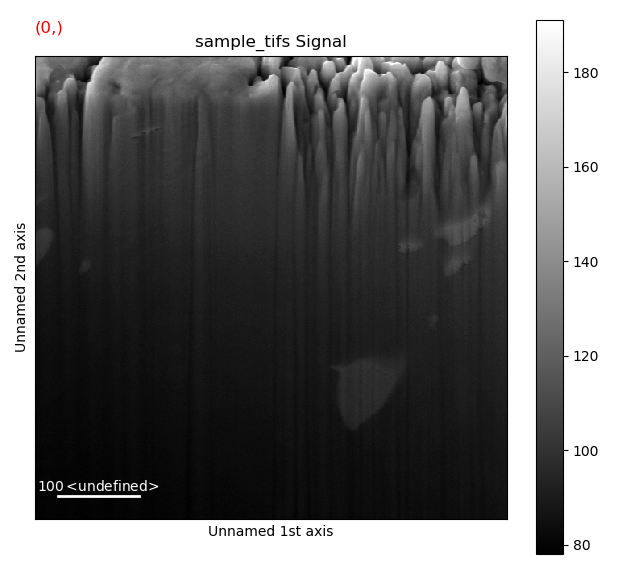

In [40]:
s_rectangular.plot()

In [44]:
#Optional section - if you want to use a specific region of interest to perform alignment on
#s.estimate_shift2D(roi = (rectangular_roi.left, rectangular_roi.right, rectangular_roi.top, rectangular_roi.bottom))

2.Registration
2a)Registration with ROI
if you want to align using the regoion in your selected ROI then run the code below. If you dont want to use a specific ROI then go to 2b.

In [45]:
s.align2D(crop = False, roi = (rectangular_roi.left, rectangular_roi.right, rectangular_roi.top, rectangular_roi.bottom))

array([[13,  8],
       [ 0,  0],
       [ 4,  5],
       [-1,  1],
       [13,  8]], dtype=int64)

2b)Run the code below if you want to do the alignment without using a specific ROI

In [18]:
s.align2D(crop = False)

array([[  0,   0],
       [-14,  -8],
       [ 12, -10],
       [ 27, -13],
       [  0,   0]], dtype=int64)

Now we have an aligned stack you can view it:

<IPython.core.display.Javascript object>


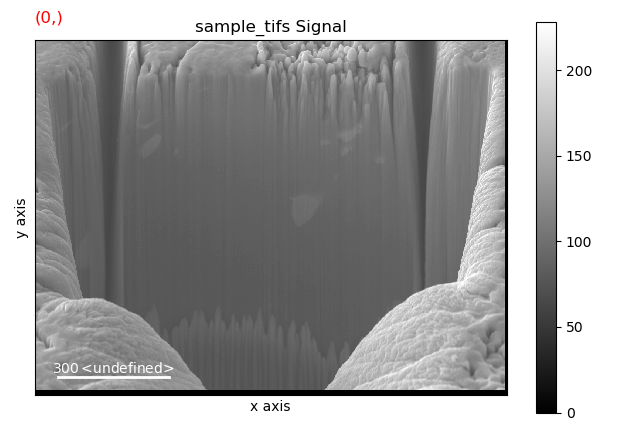

In [55]:
s.plot(navigator='slider')

Visualisation slicing through differnet axis.

The code below names the axis which is is then used later for putting them into the navigation space.

In [47]:
s.axes_manager[0].name = "z"
s.axes_manager[1].name = "x"
s.axes_manager[2].name = "y"

Run the code below to slice through in x

<IPython.core.display.Javascript object>


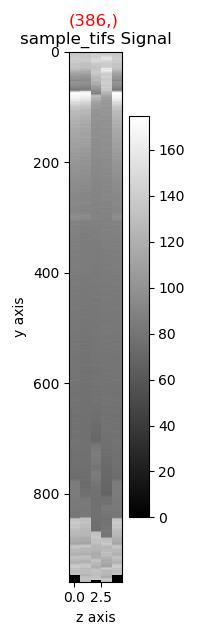

In [48]:
s = s.as_signal2D(('z','y'))
s.plot(navigator='slider')

run the code below to slice through in y

<IPython.core.display.Javascript object>


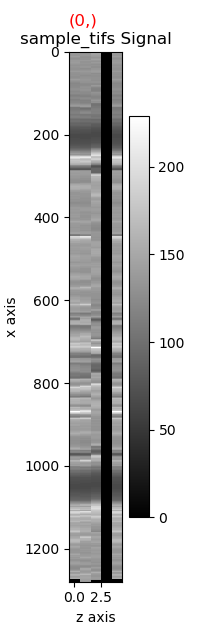

In [49]:
s = s.as_signal2D(('z','x'))
s.plot(navigator='slider')

Revert to slixing through in the z direction (displaying x and y)

<IPython.core.display.Javascript object>


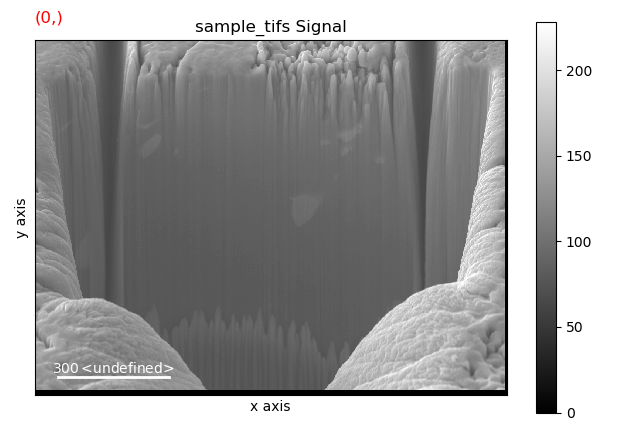

In [50]:
s = s.as_signal2D(('x','y'))
s.plot(navigator='slider')

Next we want to save our stack here we are using the hdf5 format. Replace test with what you want to call your data.

In [51]:
s.save('test.hdf5')

Overwrite 'test.hdf5' (y/n)?
y
